In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


pd.set_option('display.max_columns', None)

In [2]:
# LEO LOS DATOS DE DOS Y DETERMINO CUALES SON SUPERCONDUCTORES

dos_csv_path = r"D:\tfg\data\dos_data.csv"
data_materials = pd.read_csv(dos_csv_path)

data_materials['ICSD'] = pd.to_numeric(data_materials['ICSD'], errors='coerce')

num_nulos = data_materials['ICSD'].isnull().sum()
len_df_pre = len(data_materials)
data_materials.dropna(subset=['ICSD'], inplace=True)
print(f"{num_nulos} ({num_nulos/len_df_pre*100:.4f} %) rows where dropped because of null on ICSD.")

data_materials.ICSD = data_materials.ICSD.astype('Int64')

C:\Users\olaya\AppData\Local\Temp\ipykernel_28168\2484822075.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_materials = pd.read_csv(dos_csv_path)


1 (0.0017 %) rows where dropped because of null on ICSD.


In [6]:
# LEO DAOS DE SUPERCONDUCTORES
data_path = r"D:\tfg\data\3DSC"
file = '3DSC_ICSD_only_IDs.csv'
file_path = os.path.join(data_path, file)

supercon_data = pd.read_csv(file_path, skiprows=1)
supercon_data.columns = ['chemical_formula', 'critical_temperature_k', 'ICSD', 'synth_doped']
supercon_data['ICSD'] = supercon_data['ICSD'].str.replace('ICSD-', '')

# Superconductores que aparecen en 3DSC
ICSD_supercon = supercon_data.ICSD.unique().astype(int).tolist()

In [ ]:
# AÑADO VARIABLE PARA VER CUALES SON SUPERCON
data_materials.insert(4, 'is_superconductor', data_materials.ICSD.isin(ICSD_supercon))

In [11]:
value_counts = data_materials['is_superconductor'].value_counts()

total_count = len(data_materials['is_superconductor'])
true_count = value_counts.get(True, 0)  
false_count = value_counts.get(False, 0)
true_percentage = (true_count / total_count) * 100
print(f"Percentage of superconductors: {true_percentage:.2f}%")
print(f'Total materials: {total_count}')
print(f'Superconducting materials: {true_count}')

Percentage of superconductors: 8.17%
Total materials: 60216
Superconducting materials: 4919


In [97]:
data_materials = data_materials.rename(columns={"magnetic": "is_magnetic"})
data_materials[(data_materials.is_superconductor!='')&(data_materials.bravais_lattice=='BCC')&(data_materials.ICSD>500000)].head(5)
# data_materials.head(20)

bravais_lattice material_name    ICSD  fermi_energy  is_superconductor  \
8              BCC     Ag3Au1Te2  604514       3.59922              False   
9              BCC     Ag3Au1Te2  604788       3.61422              False   
12             BCC        Ag5Cd8  604897       2.85317               True   
76             BCC   Al2Dy3H9Ni6  657447       5.95833              False   
78             BCC     Al2Dy3Ni6  607315       5.96291              False   

    is_magnetic  DOS_0  DOS_1  DOS_2  DOS_3  DOS_4  DOS_5  DOS_6  DOS_7  \
8         False    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9         False    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12        False    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
76        False    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
78        False    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

    DOS_8  DOS_9  DOS_10  DOS_11  DOS_12  DOS_13  DOS_14  DOS_15  DOS_16  \
8     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_17  DOS_18  DOS_19  DOS_20  DOS_21  DOS_22  DOS_23  DOS_24  DOS_25  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_26  DOS_27  DOS_28  DOS_29  DOS_30  DOS_31  DOS_32  DOS_33  DOS_34  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_35  DOS_36  DOS_37  DOS_38  DOS_39  DOS_40  DOS_41  DOS_42  DOS_43  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_44  DOS_45  DOS_46  DOS_47  DOS_48  DOS_49  DOS_50  DOS_51  DOS_52  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_53  DOS_54  DOS_55  DOS_56  DOS_57  DOS_58  DOS_59  DOS_60  DOS_61  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
76     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
78     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

    DOS_62  DOS_63  DOS_64  DOS_65  DOS_66  DOS_67  DOS_68  DOS_69  DOS_70  \
8      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0   

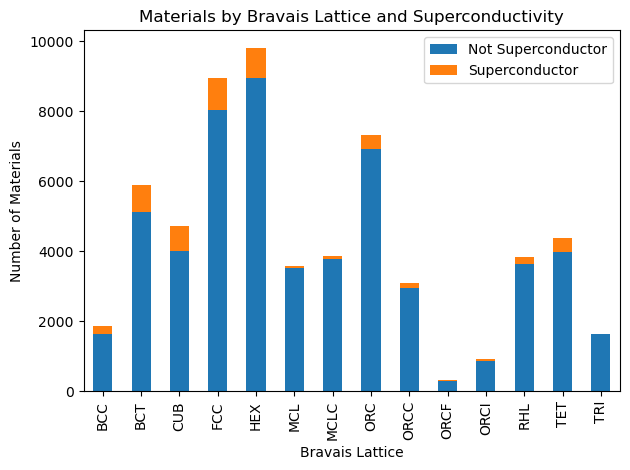

In [6]:
# Group data by Bravais lattice and superconductivity
grouped_data = data_materials.groupby(['bravais_lattice', 'is_superconductor']).size().unstack(fill_value=0)

# Create the plot
ax = grouped_data.plot(kind='bar', stacked=True)  # Use stacked bar chart
ax.set_xlabel("Bravais Lattice")
ax.set_ylabel("Number of Materials")
ax.legend(["Not Superconductor", "Superconductor"])
plt.title("Materials by Bravais Lattice and Superconductivity")
plt.tight_layout()
plt.show()

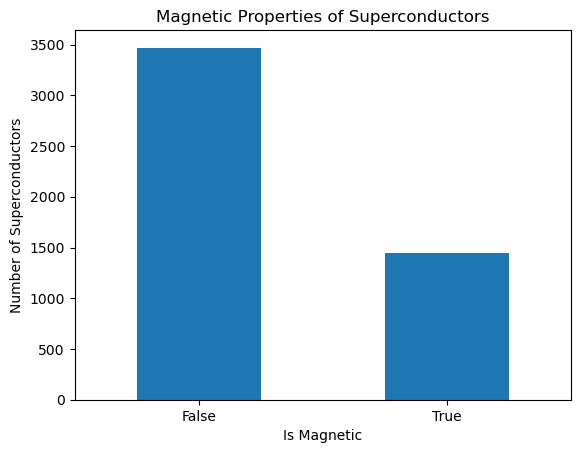

In [7]:
superconductors = data_materials[data_materials['is_superconductor'] == True]  # Filter superconductors

magnetic_counts = superconductors['is_magnetic'].value_counts()

# Create the bar chart
magnetic_counts.plot(kind='bar', rot=0)  # rot=0 to keep labels horizontal
plt.xlabel("Is Magnetic")
plt.ylabel("Number of Superconductors")
plt.title("Magnetic Properties of Superconductors")
plt.show()

In [8]:
def plot_dos(data_materials, material_identifier, by_icsd=True):
    """
    Plots the DOS vs Energy for a given material, allowing selection by name or ICSD.

    Args:
        data_materials (pd.DataFrame): The DataFrame containing material data.
        material_identifier (str or int): The name or ICSD of the material to plot.
        by_icsd (bool, optional): Whether to select by ICSD (True) or name (False). Defaults to True.
    """

    if by_icsd:
        material_data = data_materials[data_materials['ICSD'] == material_identifier].iloc[0]
    else:
        material_data = data_materials[data_materials['material_name'] == material_identifier].iloc[0]

    dos_values = material_data.loc['DOS_0':'DOS_1999']
    energy_range = np.arange(-15, 15.1, 0.1)

    print('Material information')
    print(material_data[:6])

    plt.figure(figsize=(12,4))
    plt.plot(dos_values)
    center_index = len(dos_values) // 2 
    plt.axvline(x=center_index, color='black', linestyle=':')  # Add vertical line
    plt.axhline(y=0, color='black', linestyle=':')  # Add vertical line
    plt.xticks([0, center_index, len(dos_values) - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energy - Fermi Energy")
    plt.title("DOS vs Energy ICSD: {}".format(material_data['ICSD']))
    plt.grid(False)
    
    # plt.xlim(center_index-500, center_index+500)
    plt.ylim(-5, 100)

    plt.show()

Material information
bravais_lattice          BCC
material_name        Al12Mo1
ICSD                  608582
fermi_energy         7.44838
is_superconductor       True
is_magnetic            False
Name: 236, dtype: object


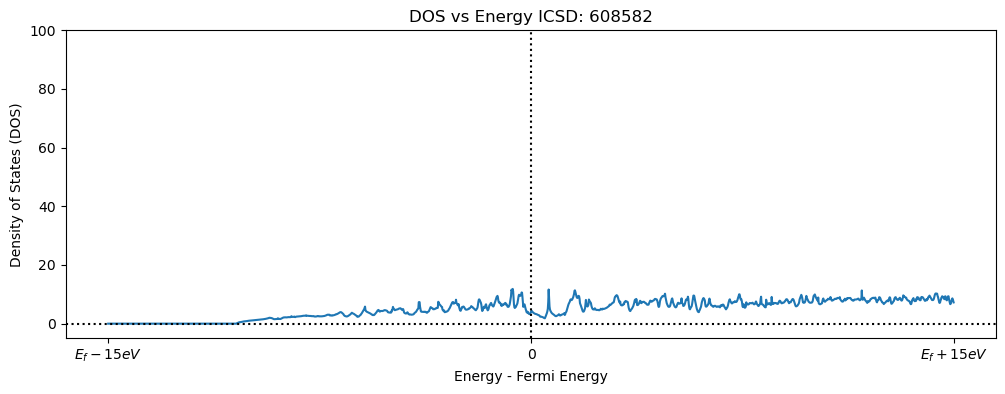

In [9]:
plot_dos(data_materials, 608582, by_icsd=True)

Material information
bravais_lattice           BCC
material_name        Al12Ta17
ICSD                   609426
fermi_energy           6.7331
is_superconductor       False
is_magnetic             False
Name: 241, dtype: object


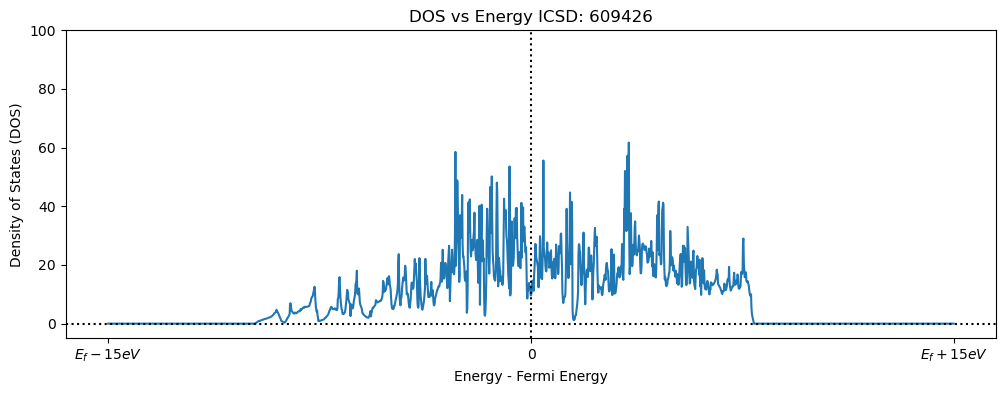

In [10]:
plot_dos(data_materials, 609426, by_icsd=True)

Material information
bravais_lattice        ORCC
material_name           Si1
ICSD                 189400
fermi_energy         3.7455
is_superconductor     False
is_magnetic           False
Name: 49019, dtype: object


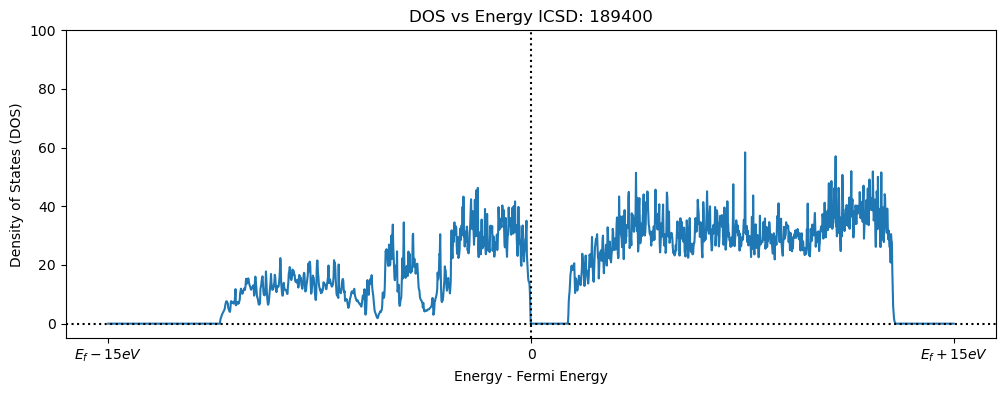

In [11]:
# El Si es un semiconductor: 89414 89415 89416 182732 189400

plot_dos(data_materials, 189400, by_icsd=True)

In [12]:
import ipywidgets as widgets

# Assuming you have a DataFrame 'data_materials' with DOS columns and 'bravais_lattice' column

def plot_average_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = None):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    if filter_bravais!=None:
        data_plot = data_materials[data_materials["bravais_lattice"].isin(filter_bravais)].copy()
        # data_plot = data_materials[data_materials.bravais_lattice!='TRI'].copy()
    else:
        data_plot = data_materials.copy()

    if is_supercon:
        grouped_data = data_plot[data_plot.is_superconductor==True].groupby('bravais_lattice')
    else:
        grouped_data = data_plot[data_plot.is_superconductor==False].groupby('bravais_lattice')
    

    plt.figure(figsize=(12,5))  # Adjust figure size as needed

    for lattice, group_data in grouped_data:
        average_dos = group_data.loc[:, 'DOS_0':'DOS_1999'].mean(axis=0)  # Calculate average DOS
        plt.plot(average_dos, label=lattice)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    if is_supercon:
        plt.title("Average DOS for Superconductors")
    else:
        plt.title("Average DOS for No Superconductors")
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-2,25)

    plt.show()


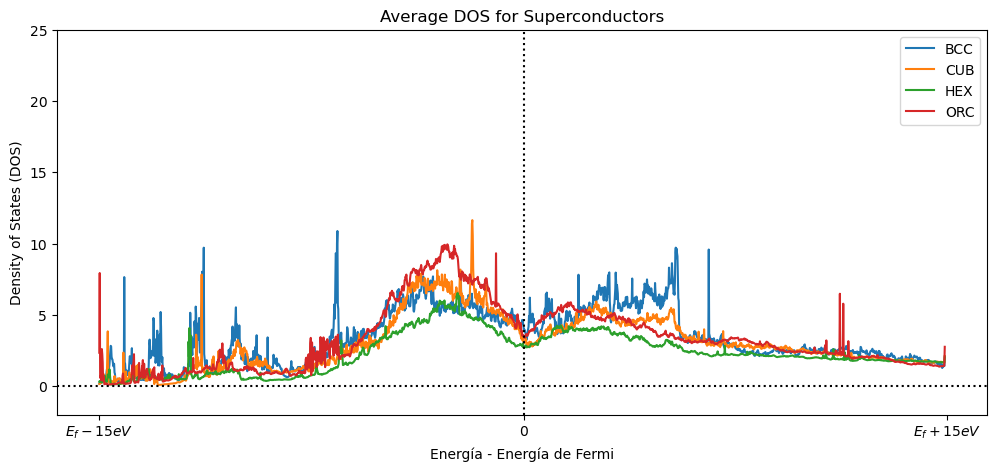

In [13]:
plot_average_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = ['BCC', 'CUB', 'HEX', 'ORC'])

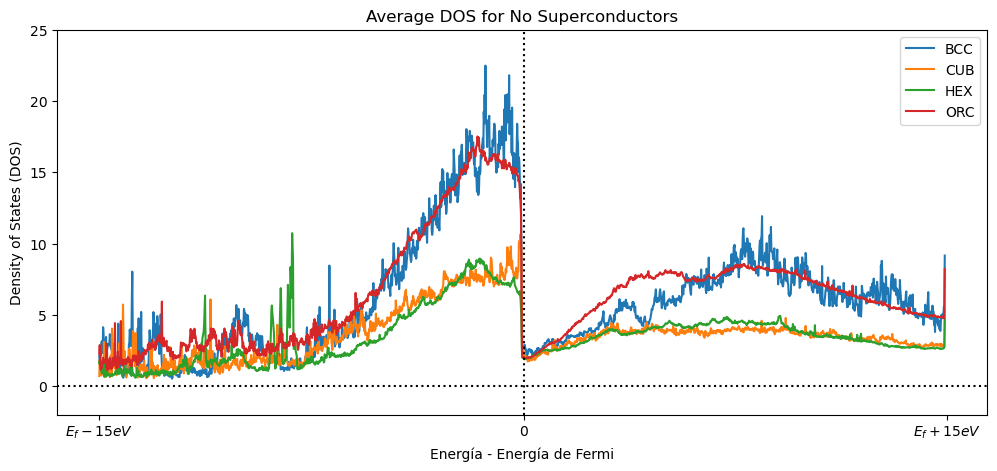

In [14]:
plot_average_dos_by_bravais(data_materials, is_supercon = False, filter_bravais = ['BCC', 'CUB', 'HEX', 'ORC'])

In [15]:
def plot_median_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = None):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    if filter_bravais!=None:
        data_plot = data_materials[data_materials["bravais_lattice"].isin(filter_bravais)].copy()
    else:
        data_plot = data_materials.copy()

    if is_supercon:
        grouped_data = data_plot[data_plot.is_superconductor==True].groupby('bravais_lattice')
    else:
        grouped_data = data_plot[data_plot.is_superconductor==False].groupby('bravais_lattice')
    

    plt.figure(figsize=(12,5))  # Adjust figure size as needed

    for lattice, group_data in grouped_data:
        average_dos = group_data.loc[:, 'DOS_0':'DOS_1999'].median(axis=0)  # Calculate average DOS
        plt.plot(average_dos, label=lattice)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    if is_supercon:
        plt.title("Median DOS for Superconductors")
    else:
        plt.title("Median DOS for No Superconductors")
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-2,10)

    plt.show()

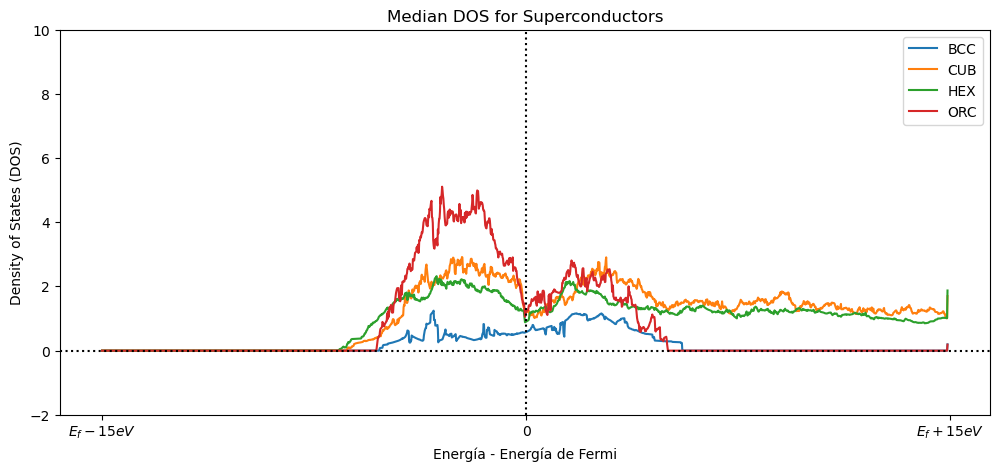

In [16]:
plot_median_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = ['BCC', 'CUB', 'HEX', 'ORC'])

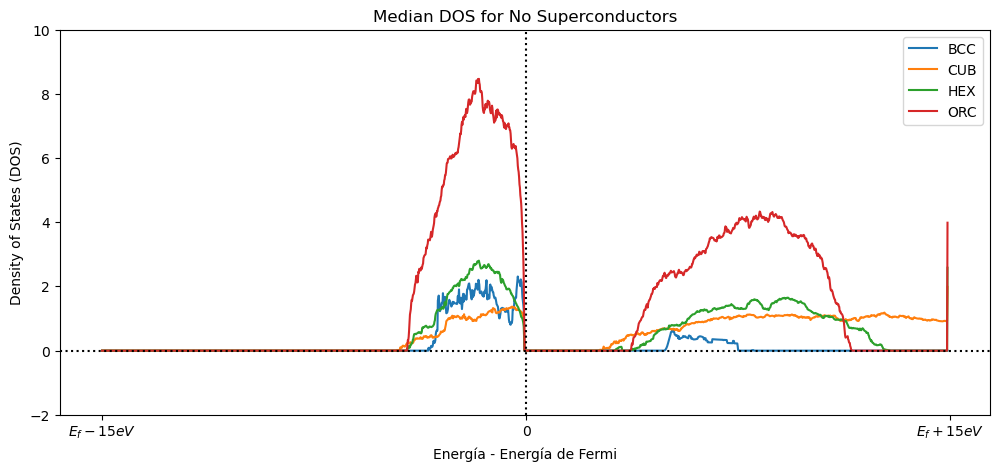

In [17]:
plot_median_dos_by_bravais(data_materials, is_supercon = False, filter_bravais = ['BCC', 'CUB', 'HEX', 'ORC'])

Se observa un corte en Ef para mat no supercon

In [98]:
# Columnas por tipo de dato
categorical_cols = ['bravais_lattice']
numerical_cols = ['fermi_energy'] + [f'DOS_{i}' for i in range(2000)]
target_col = ['is_superconductor']

# Transformaciones
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Preprocesamiento y división
X = data_materials.drop(target_col, axis=1)
X = X.fillna(0)
y = data_materials[target_col]
y = y.iloc[:, 0]
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [17]:

# Define los índices de las columnas categóricas
categorical_features = [0,1,2,4]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# # Crear una instancia de SMOTE
# smote = SMOTE(random_state=42)

# # Aplicar SMOTE al conjunto de entrenamiento
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# y_train_resampled.value_counts()

In [ ]:
print('y no over_sampling')
no_y = y.value_counts().tolist()
print(no_y)
print('Perc supercon: ',f'{no_y[1]/no_y[0]*100:.2f}', '%')
print('\ny with over_sampling')
yes_y = y_train_resampled.value_counts().tolist()
print(yes_y)
print('Perc supercon: ',f'{yes_y[1]/yes_y[0]*100:.2f}', '%')

In [100]:
clusters = [1, 2, 3, 4, 5, 10, 15, 20]
accuracy_scores = []

for n_neighbors in clusters:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

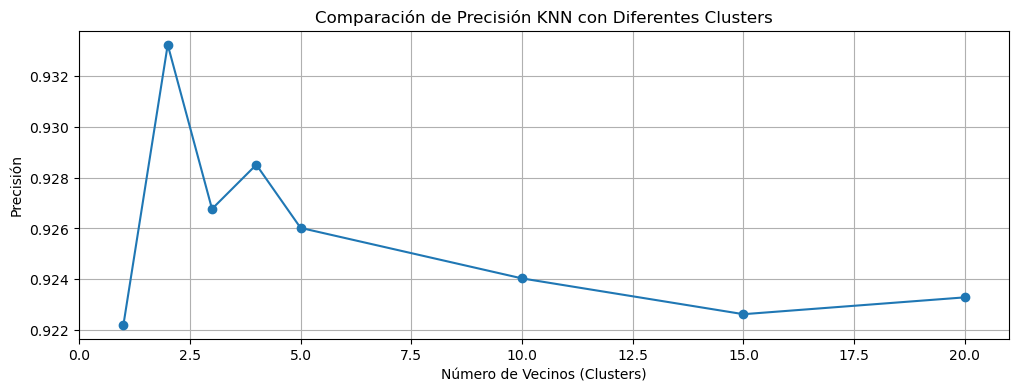

In [101]:
plt.figure(figsize=(12,4))
plt.plot(clusters, accuracy_scores, marker='o')
plt.xlabel("Número de Vecinos (Clusters)")
plt.ylabel("Precisión")
plt.title("Comparación de Precisión KNN con Diferentes Clusters")
plt.grid(True)
plt.xlim(0,21)
plt.show()

In [102]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9332447691796745
Precision: 0.9225208262217354
Recall: 0.9332447691796745
F1 Score: 0.9243053175529224
Confusion Matrix:
[[10899   189]
 [  615   341]]


In [2]:
from autogluon.tabular import TabularPredictor


In [ ]:
# Define el nombre de la columna objetivo (variable a predecir)
label_column = 'is_superconductor'
train_data2 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# Crea el predictor de AutoGluon
predictor = TabularPredictor(label=label_column, eval_metric=[], problem_type='binary') 
# train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
predictor.fit(data_materials)


In [4]:
# Obtiene el leaderboard de los mejores modelos
predictor = TabularPredictor.load(r"AutogluonModels\ag-20240418_214810")
leaderboard = predictor.leaderboard()
leaderboard

model  score_val eval_metric  pred_time_val    fit_time  \
0   WeightedEnsemble_L2     0.9596    accuracy       0.287473  176.711627   
1       NeuralNetFastAI     0.9564    accuracy       0.153298  123.259853   
2              CatBoost     0.9556    accuracy       0.063589   19.579792   
3         LightGBMLarge     0.9496    accuracy       0.048035   48.985181   
4        ExtraTreesEntr     0.9480    accuracy       0.069055   31.208571   
5        ExtraTreesGini     0.9476    accuracy       0.070086   33.803444   
6      RandomForestEntr     0.9460    accuracy       0.128759   35.431584   
7      RandomForestGini     0.9452    accuracy       0.064063   33.080708   
8              LightGBM     0.9448    accuracy       0.039532   14.000995   
9            LightGBMXT     0.9396    accuracy       0.040036   23.206882   
10       NeuralNetTorch     0.9372    accuracy       0.801785  234.389049   
11              XGBoost     0.9332    accuracy       0.162752   44.301651   
12       KNeighborsUnif     0.9196    accuracy       1.377926    3.836036   
13       KNeighborsDist     0.9184    accuracy       1.301993    2.705440   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000500           0.068539            2       True   
1                 0.153298         123.259853            1       True   
2                 0.063589          19.579792            1       True   
3                 0.048035          48.985181            1       True   
4                 0.069055          31.208571            1       True   
5                 0.070086          33.803444            1       True   
6                 0.128759          35.431584            1       True   
7                 0.064063          33.080708            1       True   
8                 0.039532          14.000995            1       True   
9                 0.040036          23.206882            1       True   
10                0.801785         234.389049            1       True   
11                0.162752          44.301651            1       True   
12                1.377926           3.836036            1       True   
13                1.301993           2.705440            1       True   

    fit_order  
0          14  
1          10  
2           7  
3          13  
4           9  
5           8  
6           6  
7           5  
8           4  
9           3  
10         12  
11         11  
12          1  
13          2

In [26]:
# Obtiene el mejor modelo
# best_model = predictor.get_model_best()

# Guarda el mejor modelo
# predictor.save_model(model_name='best_model')

In [ ]:
from imblearn.over_sampling import SMOTENC

label_column = 'is_superconductor'

categorical_features = [0,1,2,4]
data_materials_2 = data_materials.fillna(0)
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(data_materials_2.drop(label_column, axis=1), data_materials_2[label_column])

In [38]:
X_resampled = pd.DataFrame(X_train_resampled)
y_resampled = pd.DataFrame(y_train_resampled)

train_data2 = pd.concat([X_resampled, y_resampled], axis=1)

0    1    2    3    4    5    6         7    8    9   10   11   12  \
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...   
88413  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
88414  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
88415  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.419962  0.0  0.0  0.0  0.0  0.0   
88416  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.000000  0.0  0.0  0.0  0.0  0.0   
88417  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  1.0  0.0   

        13        14        15        16        17        18        19  \
0      0.0  0.060525 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
1      0.0  0.059461 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
2      0.0 -0.190487 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
3      0.0 -0.601168  0.257010  0.213091  0.221557  0.122293  0.362312   
4      0.0  1.415163 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
...    ...       ...       ...       ...       ...       ...       ...   
88413  0.0  0.689525 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
88414  0.0  0.903009 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
88415  0.0  1.073742 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
88416  0.0  0.886825 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
88417  0.0  0.699007 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   

             20        21        22        23        24        25        26  \
0     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
1     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
2     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
3      0.037849  0.254145  0.142299  0.084247  0.060803  0.050052  0.015533   
4     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
...         ...       ...       ...       ...       ...       ...       ...   
88413 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
88414 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
88415 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
88416 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   
88417 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.042780   

             27        28        29       30        31        32        33  \
0     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
1     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
2     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
3     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
4     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
...         ...       ...       ...      ...       ...       ...       ...   
88413 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
88414 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
88415 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
88416 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
88417 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   

             34        35       36        37        38        39        40  \
0     -0.065076 -0.040953 -0.06635 -0.063484 -0.071073 -0.069849 -0.069673   
1     -0.065076 -0.040953 -0.06635 -0.063484 -0.071073 -0.069849 -0.069673   
2     -0.065076 -0.040953 -0.06635 -0.063484 -0.071

In [39]:
predictor2 = TabularPredictor(label=label_column, eval_metric='accuracy', problem_type='binary')
predictor2.fit(train_data2)

No path specified. Models will be saved in: "AutogluonModels\ag-20240418_223716"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Cannot interpret 'BooleanDtype' as a data type
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels

[1000]	valid_set's binary_error: 0.1044
[2000]	valid_set's binary_error: 0.0916
[3000]	valid_set's binary_error: 0.0872
[4000]	valid_set's binary_error: 0.082
[5000]	valid_set's binary_error: 0.0812


	0.9204	 = Validation score   (accuracy)
	309.33s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_error: 0.084
[2000]	valid_set's binary_error: 0.078
[3000]	valid_set's binary_error: 0.0764


	0.9244	 = Validation score   (accuracy)
	188.1s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9208	 = Validation score   (accuracy)
	85.91s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9224	 = Validation score   (accuracy)
	89.48s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	0.9244	 = Validation score   (accuracy)
	1142.5s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9272	 = Validation score   (accuracy)
	83.02s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.928	 = Validation score   (accuracy)
	81.56s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.85	 = Validation score   (accuracy)
	147.65s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: XGBoost ...
	0.928	 = Validation score   (accuracy)
	316.5s	 = Training   runtime
	

In [5]:
predictor2 = TabularPredictor.load(r"AutogluonModels\ag-20240418_223716")
leaderboard2 = predictor2.leaderboard()

In [6]:
leaderboard2

model  score_val eval_metric  pred_time_val     fit_time  \
0   WeightedEnsemble_L2     0.9360    accuracy       0.372369   790.488308   
1        ExtraTreesEntr     0.9280    accuracy       0.061045    81.561649   
2               XGBoost     0.9280    accuracy       0.173620   316.495270   
3        ExtraTreesGini     0.9272    accuracy       0.060106    83.020706   
4         LightGBMLarge     0.9248    accuracy       0.046034   130.380688   
5              CatBoost     0.9244    accuracy       0.030023  1142.501418   
6              LightGBM     0.9244    accuracy       0.055541   188.100733   
7      RandomForestEntr     0.9224    accuracy       0.061574    89.478599   
8      RandomForestGini     0.9208    accuracy       0.061554    85.912365   
9            LightGBMXT     0.9204    accuracy       0.077102   309.326888   
10       KNeighborsDist     0.8804    accuracy       1.869772     4.785236   
11       KNeighborsUnif     0.8692    accuracy       1.971651     4.534461   
12       NeuralNetTorch     0.8544    accuracy       0.857566   331.097430   
13      NeuralNetFastAI     0.8500    accuracy       0.120508   147.649905   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000497           0.083795            2       True   
1                 0.061045          81.561649            1       True   
2                 0.173620         316.495270            1       True   
3                 0.060106          83.020706            1       True   
4                 0.046034         130.380688            1       True   
5                 0.030023        1142.501418            1       True   
6                 0.055541         188.100733            1       True   
7                 0.061574          89.478599            1       True   
8                 0.061554          85.912365            1       True   
9                 0.077102         309.326888            1       True   
10                1.869772           4.785236            1       True   
11                1.971651           4.534461            1       True   
12                0.857566         331.097430            1       True   
13                0.120508         147.649905            1       True   

    fit_order  
0          14  
1           9  
2          11  
3           8  
4          13  
5           7  
6           4  
7           6  
8           5  
9           3  
10          2  
11          1  
12         12  
13         10

In [39]:
metricas = [
    'f1_score',
    'accuracy_score',
    'balanced_accuracy_score',
    'roc_auc_score',
]
test_data = pd.concat(
    [pd.DataFrame(X_test).reset_index(), pd.DataFrame(y_test).reset_index()], 
    axis=1, 
    ignore_index=True
)
test_data = test_data.rename(columns={2017: 'is_superconductor'})
test_data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1          1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3          3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4          4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12039  12039  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12040  12040  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12041  12041  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12042  12042  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
12043  12043  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14        15        16        17        18        19        20  \
0      0.0  1.222681 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
1      0.0 -0.829191 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
2      0.0  0.589143 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
3      0.0 -1.790524 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
4      0.0  1.336869 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
...    ...       ...       ...       ...       ...       ...       ...   
12039  0.0  2.073315 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
12040  0.0  0.573085 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
12041  0.0  0.714426 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
12042  0.0 -1.645110 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   
12043  0.0  1.582476 -0.052637 -0.050973 -0.050473 -0.026094 -0.070753   

             21        22        23        24        25        26       27  \
0     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
1     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
2     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
3     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
4     -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
...         ...       ...       ...       ...       ...       ...      ...   
12039 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
12040 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
12041 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
12042 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   
12043 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358 -0.04278   

             28        29        30       31        32        33        34  \
0     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
1     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
2     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
3     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
4     -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
...         ...       ...       ...      ...       ...       ...       ...   
12039 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
12040 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
12041 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
12042 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   
12043 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542 -0.038668   

             35        36       37        38        39        40        41  \
0     -0.065076 -0.040953 -0.06635 -0.063484 -0.071073 -0.069849 -0.069673   
1     -0.065076 -0.040953 -0.06635 -0.063484 -0.071073 -0.069849 -0.069673   
2     -0.065076 -0.040953 -0.06635 -0.063

In [40]:
predictor2.evaluate(test_data)

{'accuracy': 0.9146462969113252,
 'balanced_accuracy': 0.6788402932492891,
 'mcc': 0.38085976240118846,
 'roc_auc': 0.8217766332632965,
 'f1': 0.42569832402234636,
 'precision': 0.4568345323741007,
 'recall': 0.3985355648535565}

In [42]:
resultados2 = predictor2.leaderboard(test_data, extra_metrics=['f1', 'roc_auc', 'precision', 'recall'])
resultados2

model  score_test        f1   roc_auc  precision    recall  \
0   WeightedEnsemble_L2    0.914646  0.425698  0.821777   0.456835  0.398536   
1      RandomForestGini    0.912155  0.384168  0.796355   0.433071  0.345188   
2               XGBoost    0.906011  0.320528  0.686828   0.376056  0.279289   
3        ExtraTreesGini    0.896380  0.417910  0.837113   0.377104  0.468619   
4              CatBoost    0.896131  0.300727  0.693361   0.322929  0.281381   
5        ExtraTreesEntr    0.895384  0.427273  0.842920   0.377814  0.491632   
6              LightGBM    0.887579  0.307062  0.687735   0.300601  0.313808   
7            LightGBMXT    0.870143  0.329906  0.709926   0.279390  0.402720   
8      RandomForestEntr    0.867486  0.376563  0.801399   0.300499  0.504184   
9       NeuralNetFastAI    0.845068  0.270524  0.748200   0.215980  0.361925   
10        LightGBMLarge    0.777483  0.273319  0.692648   0.184480  0.527197   
11       KNeighborsDist    0.737795  0.307152  0.796578   0.194336  0.732218   
12       KNeighborsUnif    0.728662  0.301112  0.795516   0.189247  0.736402   
13       NeuralNetTorch    0.310113  0.146832  0.528846   0.081407  0.747908   

    score_val eval_metric  pred_time_test  pred_time_val     fit_time  \
0      0.9360    accuracy        2.068192       0.372369   790.488308   
1      0.9208    accuracy        0.327000       0.061554    85.912365   
2      0.9280    accuracy        0.836500       0.173620   316.495270   
3      0.9272    accuracy        0.409997       0.060106    83.020706   
4      0.9244    accuracy        0.117002       0.030023  1142.501418   
5      0.9280    accuracy        0.412696       0.061045    81.561649   
6      0.9244    accuracy        0.240000       0.055541   188.100733   
7      0.9204    accuracy        0.406499       0.077102   309.326888   
8      0.9224    accuracy        0.314500       0.061574    89.478599   
9      0.8500    accuracy        0.641480       0.120508   147.649905   
10     0.9248    accuracy        0.186949       0.046034   130.380688   
11     0.8804    accuracy        8.538001       1.869772     4.785236   
12     0.8692    accuracy        8.622499       1.971651     4.534461   
13     0.8544    accuracy        2.370029       0.857566   331.097430   

    pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  \
0                  0.002501                0.000497           0.083795   
1                  0.327000                0.061554          85.912365   
2                  0.836500                0.173620         316.495270   
3                  0.409997                0.060106          83.020706   
4                  0.117002                0.030023        1142.501418   
5                  0.412696                0.061045          81.561649   
6                  0.240000                0.055541         188.100733   
7                  0.406499                0.077102         309.326888   
8                  0.314500                0.061574          89.478599   
9                  0.641480                0.120508         147.649905   
10                 0.186949                0.046034         130.380688   
11                 8.538001                1.869772           4.785236   
12                 8.622499                1.971651           4.534461   
13                 2.370029                0.857566         331.097430   

    stack_level  can_infer  fit_order  
0             2       True         14  
1             1       True          5  
2             1       True         11  
3             1       True          8  
4             1       True          7  
5             1       True          9  
6             1       True          4  
7             1       True          3  
8             1       True          6  
9             1       True         10  
10            1       True         13  
11            1       True          2  
12            1       True          1  
13            1       True         12

In [91]:
test_data1 = test_data.copy()

is_superconductor = test_data1.columns[-1]
test_data1 = pd.concat(
    [test_data1.iloc[:, 0:4], test_data1.iloc[:, -1], test_data1.iloc[:, 4:-13]],
    axis=1
)
test_data1.columns = data_materials.columns
print(len(test_data1.columns))
print(len(data_materials.columns))
test_data1

2006
2006


bravais_lattice  material_name  ICSD  fermi_energy  is_superconductor  \
0                    0            0.0   0.0           0.0              False   
1                    1            0.0   0.0           0.0              False   
2                    2            0.0   0.0           0.0              False   
3                    3            0.0   0.0           0.0              False   
4                    4            0.0   0.0           0.0              False   
...                ...            ...   ...           ...                ...   
12039            12039            0.0   0.0           1.0              False   
12040            12040            0.0   0.0           0.0              False   
12041            12041            0.0   0.0           0.0              False   
12042            12042            0.0   0.0           0.0              False   
12043            12043            0.0   0.0           0.0              False   

       is_magnetic  DOS_0  DOS_1  DOS_2  DOS_3  DOS_4  DOS_5  DOS_6  DOS_7  \
0              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1              0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3              0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4              1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
12039          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12040          0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12041          1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12042          0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
12043          1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       DOS_8  DOS_9    DOS_10    DOS_11    DOS_12    DOS_13    DOS_14  \
0        1.0    0.0  1.222681 -0.052637 -0.050973 -0.050473 -0.026094   
1        0.0    0.0 -0.829191 -0.052637 -0.050973 -0.050473 -0.026094   
2        0.0    0.0  0.589143 -0.052637 -0.050973 -0.050473 -0.026094   
3        0.0    0.0 -1.790524 -0.052637 -0.050973 -0.050473 -0.026094   
4        0.0    0.0  1.336869 -0.052637 -0.050973 -0.050473 -0.026094   
...      ...    ...       ...       ...       ...       ...       ...   
12039    0.0    0.0  2.073315 -0.052637 -0.050973 -0.050473 -0.026094   
12040    0.0    0.0  0.573085 -0.052637 -0.050973 -0.050473 -0.026094   
12041    0.0    0.0  0.714426 -0.052637 -0.050973 -0.050473 -0.026094   
12042    0.0    0.0 -1.645110 -0.052637 -0.050973 -0.050473 -0.026094   
12043    0.0    0.0  1.582476 -0.052637 -0.050973 -0.050473 -0.026094   

         DOS_15    DOS_16    DOS_17    DOS_18    DOS_19    DOS_20    DOS_21  \
0     -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
1     -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
2     -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
3     -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
4     -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
...         ...       ...       ...       ...       ...       ...       ...   
12039 -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
12040 -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
12041 -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
12042 -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   
12043 -0.070753 -0.016936 -0.073324 -0.058076 -0.051794 -0.056014 -0.055358   

        DOS_22    DOS_23    DOS_24    DOS_25   DOS_26    DOS_27    DOS_28  \
0     -0.04278 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542   
1     -0.04278 -0.060909 -0.022203 -0.050245 -0.04709 -0.035256 -0.058542   
2     -0.04278 -0.060909 -0.022203 -0.050245 -0.0470

In [92]:
predictor.evaluate(test_data1)

c:\Users\olaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.9206243772832946,
 'balanced_accuracy': 0.5,
 'mcc': 0.0,
 'roc_auc': 0.49317720502997703,
 'f1': 0.0,
 'precision': 0.0,
 'recall': 0.0}

In [ ]:
from tabulate import tabulate
from autogluon.tabular import TabularDataset, TabularPredictor

path_for_run = r'autogluon/smote_TRUE'
predictor = TabularPredictor(label='revenue_per_impression', problem_type='binary', eval_metric='f1', path = r'autogluon/').fit(
        TabularDataset(train_data),
        num_bag_folds=5, num_bag_sets=1, num_stack_levels=3,
        # hyperparameters=hyperparameters,
        presets='best_quality')

predictor.evaluate(test_data)
predictor.leaderboard(test_data, extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

In [ ]:
from sklearn.metrics import confusion_matrix

# Inicializar una lista para almacenar todas las matrices de confusión
confusion_matrices = []

for n_neighbors in clusters:
    print(f'· Number of clusters: {n_neighbors}...')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Agregar la matriz de confusión a la lista
    confusion_matrices.append(cm)

    # Puedes imprimir la matriz de confusión si lo deseas
    print(f'Confusion Matrix for {n_neighbors} clusters:')
    print(cm)


In [ ]:
clusters = [1, 2, 3, 5, 7, 9, 11, 13, 15, 20]
accuracy_scores = []

for n_neighbors in clusters:
    print(f'· Number of klusters: {n_neighbors}...')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
plt.plot(clusters, accuracy_scores, marker='o')
plt.xlabel("Número de Vecinos (Clusters)")
plt.ylabel("Precisión")
plt.title("Comparación de Precisión KNN con Diferentes Clusters")
plt.grid(True)
plt.show()

In [ ]:
# Inicializar una lista para almacenar todas las matrices de confusión
confusion_matrices = []

for n_neighbors in clusters:
    print(f'· Number of clusters: {n_neighbors}...')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred = knn.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Agregar la matriz de confusión a la lista
    confusion_matrices.append(cm)

    # Puedes imprimir la matriz de confusión si lo deseas
    print(f'Confusion Matrix for {n_neighbors} clusters:')
    print(cm)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 20]}

# Crear el clasificador KNN
knn = KNeighborsClassifier()

# Realizar una búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Mostrar el mejor valor de n_neighbors encontrado
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])

In [ ]:
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors=2)

X_resampled, y_resampled = smote.fit_resample(X_processed, y)
# Realizar validación cruzada
scores = cross_val_score(knn, X_resampled, y_resampled, cv=5)

# Imprimir los puntajes de validación cruzada
print("Cross-validation scores:", scores)

# Calcular y mostrar el promedio de los puntajes
print("Average accuracy:", scores.mean())

In [ ]:
                    DOS
    ^   |                   |
    |   |                   |
    |   |                   |       -------
    |   |                   |      /       \
    |   |                   |     /         \
    |   |                   |    /           \     -------
    |   |                   |   /             \   /       \
    |   |                   |  /               \ /         \
    |   |                   | /                 ------------
----|---|-------------------|-------------------|-----------  Energía
      |   Banda Prohibida   |  Banda Conducción |
      |                   |                   |
      |   Banda Valencia   |                   |

(a) Semiconductor

                    DOS
    ^   |                   |
    |   |                   |
    |   |   -------        |
    |   |  /       \       |
    |   | /         \      |
    |   | ------------     |
    |   |/               \   |
    |   /                 \  |
    |/                   \ |
----|-----------------------|-----------  Energía
      |   Banda Prohibida   |
      |  Superconductora  |

(b) Superconductor